## Inversión de problemas no-lineales por estrategias globales de inferencia bayesiana

# El famoso "Monte Carlo" y las "Cadenas de Markov" : MCMC

Los métodos de Monte Carlo por cadenas de Markov son una familia de técnicas estadísticas computacionales que utilizan dos conceptos: 1) Cadenas de Markov y 2) Simulaciones de Monte Carlo para inferir o estimar características de funciones complejas que, sin el uso de estas estrategias numéricas, serían extremadamente difíciles de evaluar. Para comprender la idea principal detrás de estos métodos, permíteme explicar brevemente cada uno de los conceptos que forman parte de estas técnicas

Métodos de Monte Carlo: Estas técnicas son métodos de muestreo directo. También se les conoce con el término de simulaciones estocásticas, ya que el muestreo de una función dada se selecciona de manera aleatoria de todos los valores disponibles que la función toma. La idea principal detrás de estas técnicas es que las características y otras estimaciones de una función dada pueden obtenerse en base a un muestreo aleatorio repetitivo masivo de la misma.

Cadena de Markov: Siguiendo a (Brooks et al., 2011), una secuencia m (1), m (2), ..., m (n) de elementos aleatorios de algún conjunto se dice que es una Cadena de Markov si la distribución condicional de m (n+1) dado m (1), ..., m (n) depende únicamente de m (n), lo cual se denota como P(m (n) | m (n−1)). El conjunto en el cual cada m (i) tiene lugar se conoce como el espacio de estados de la Cadena de Markov.

En el campo de la inferencia estadística bayesiana, hay varias técnicas que podrían utilizarse para intentar obtener una descripción correcta de P (m|d). Una gran familia de estas técnicas está relacionada con el método de Monte Carlo, así como con el concepto de Cadenas de Markov. Para detallar aún más estas técnicas y su aplicación al problema de inversión de la fuente cinemática, es necesario primero introducir otro elemento importante conocido como la función de distribución de probabilidad propuesta. La mayoría de las estrategias bayesianas que incorporan la técnica de Monte Carlo en sus algoritmos se basan en una evaluación sistemática de la función de probabilidad condicional P (m|d) de una gran cantidad de modelos (miles o millones de ellos). Por lo tanto, para esas técnicas, es muy importante definir una manera, o una función, para seleccionar cada uno de estos modelos que sean calificados a partir de la enorme población de todos los posibles modelos. Esta función se conoce como la función de distribución de probabilidad propuesta.

### Algoritmo MCMC

Información de entrada: Funciones de probabilidad de informaicón a prior, verosimilitud y de predicción.

1. Establece iteración k = 0.
2. Obtenga el primer estado, $m^{(k)}$, a partir de la función de probabilidad a priori $m^{(k)} ∼ P(m)$.
3. Mientras $k < K$, hacer lo siguiente:

    3.1 Aumentar $k$ en 1: $k = k+1$
    
    3.2 Obten un nuevo estado $m^{(k)}$ usando la función de probabilidad propuesta $m^{(k)} ∼ P(m (k) | m^{(k-1))}$
    
    3.3 Estimar la razón 
    $$
    r = \frac{P (m^{(k^*)} | d) P(m^{(k-1)}|m^{(k^*)})}
             {P (m^{(k-1)} | d) P(m^{(k^*)}|m^{(k-1)})},  \qquad \text{(Criterio Metropolis-Hastings)}
    $$


    3.4 Genere un número aleatorio $u$, donde $u =$ Unif$(0, 1)$
    
    3.5 IF $u < r$, entonces:
    
      3.5.1 Acepta el estado propuesto $m^{(k^*)}$ y establece 
        $$m^{(k)} = m^{(k^*)}$$

    ELSE:      
    
      3.5.2 Rechaza el estado propuesto $m^{(k^*)}$ y establecer 
        $$m^{(k)} = m^{(k-1)}$$


## Un problema 2D en Sismología: Estimación de espectors y frecuencia esquina (corner frequency)

El primer ejemplo en esta sección está relacionado con la inferencia de los dos parámetros que se utilizan para describir el espectro de desplazamiento (fuente sísmica) del modelo de Brune para un conjunto de datos reales. La inferencia de estos dos parámetros y sus incertidumbres se llevan a cabo mediante una estrategias: 1) una estrategia estándar de MCMC.

El principal objetivo de este ejemplo es mostrar la aplicabilidad del MCMC a problemas sismológicos, así como ilustrar su convergencia y exploración del espacio del modelo (espacio de soluciones).


Problema: Un parámetro que se ha utilizado durante mucho tiempo para caracterizar el tamaño de los terremotos y otras características importantes relacionadas con estos eventos (como la caída de estrés) es la frecuencia de esquina (fc) del espectro de la fuente. Uno de los modelos matemáticos que comúnmente se utiliza en sismología para representar teóricamente el espectro de la fuente de desplazamiento es el modelo de Brune (Brune, 1970).

<img src="images/spectra.png" width="70%">

El modelo de Brune está dado por la siguiente relación en el dominio de la frequencia

$$
u(f) = \frac{\Omega_0}{1 + (f/f_c)^n}
$$

o, en su versión más sencilla logarítmica

$$
\log(u(f)) = \log(\Omega_0) - \log(1 + (f/f_c)^n)
$$

donde la amplitud del espectro de desplazamiento u en una frecuencia dada f puede determinarse en función de la amplitud de largos períodos (proporcional al momento sísmico) Ω0, la frecuencia de esquina fc y la tasa de disminución de la energía en alta frecuencia (es decir, n = 2 para modelos ω2). Ω0 y fc son atributos de la fuente muy importantes que pueden estar relacionados con la caída de estrés de un terremoto (Madariaga, 1976; Abercrombie, 1995; Shearer et al., 2006; Kaneko y Shearer, 2014). Por lo tanto, es importante inferir estos atributos, así como sus incertidumbres.







Para este primer ejercicio, el objetivo es obtener la frecuencia de esquina (fc) y la amplitud de largos períodos (Ω0 ), así como sus incertidumbres, a partir de un registro real. Para ello, utilizaremos como conjunto de datos el registro sin procesar (en ganancia) de un sismo preliminar del terremoto de Tohoku de 2011. Este evento (según el Catálogo de la JMA) ocurrió el 10 de marzo de 2011 a las 6:23:59.75 (hora GMT) en 38.1722 grados de latitud norte y 143.0448 grados de longitud este, a una profundidad de aproximadamente 9.3 km. Utilizaremos sólo la componente vertical del receptor KNIH de la red Hi-net, que registró la velocidad de partículas para ese terremoto a una distancia de aproximadamente 200 km del epicentro. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

Text(0, 0.5, 'Amplitude (Cuentas)')

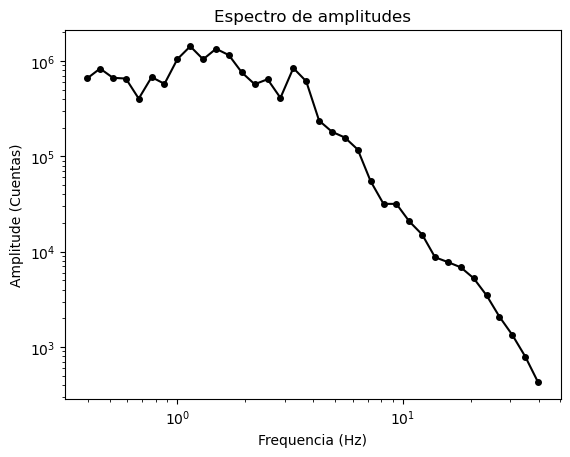

In [2]:
# Cargar los datos
file_name = 'Spectra_M68.txt'
freq_data, amp_data = np.loadtxt(file_name, dtype=float, delimiter=' ', usecols=(0, 1), unpack=True)

# Interpolemos para tener menos muestras bien repartidas
f_axis_interp = np.linspace(-0.4,1.6,36)
logf = 10.**f_axis_interp

amp_data_interp = np.interp(logf, freq_data, amp_data)


# Graficamos el espectro
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

ax1.loglog(logf, amp_data_interp, c='black', marker='.', markersize=8)
ax1.set_title('Espectro de amplitudes')
ax1.set_xlabel('Frequencia (Hz)')
ax1.set_ylabel('Amplitude (Cuentas)')

No proceso el registro ya que no quierotener en cuenta ninguna corrección del instrumento. El registro se corrigió en la línea de base y se cortó para considerar solo los primeros 40 segundos. A partir de este corte, se estimó el espectro de amplitud de Fourier utilizando una versión atenuada de la señal. Luego, se suaviza este espectro utilizando la función de suavizado de Konno-Ohmachi (Konno y Ohmachi, 1998). El espectro resultante se muestra en la siguiente figura (línea negra sólida). El objetivo de este ejercicio es estimar fc y Ω0 con ayuda del MCMC. 

Para aplicar la estrategia estándar de MCMC según se detalla en el Algoritmo 1, es necesario definir las funciones de distribución previa, de verosimilitud y de predicción. Para ello, la verosimilitud se diseña como una función de distribución normal con una desviación estándar σ = 2. Recordemos que los espectros observados y predichos se comparan en una escala logarítmica. Por lo tanto, la desviación estándar está relacionada con los valores logarítmicos de los espectros. Por otro lado, decido usar para cada parámetro (por separado) una distribución uniforme no informativa. Para la frecuencia de esquina, los valores mínimos y máximos de la distribución uniforme son -2.3 y 1.6, que corresponden a fc min = exp(−2.3) = 0.1 Hz y fc max = exp(2.6) = 13.4 Hz. Para la amplitud de largos períodos Ω0, los valores mínimos y máximos de la distribución uniforme están fijados en 1 y 13 (logaritmo de la amplitud en ganancia), lo que corresponde a Ω0 min = exp(1) = 2.7183 y Ω0 max = exp(15) = 3.26×10^6. Como se puede observar, la exploración del espacio se realiza en un espacio logarítmico. Por lo tanto, defino una distribución normal 2D centrada en el estado actual y con una matriz de covarianza diagonal, diag(Σ) proposal = [0.01, 0.01]^T , como la función de distribución de propuesta en el espacio logarítmico. 

In [3]:
# MCMC aplicado a regresiones lineales de la forma: %
#       y = ax + b
# params:  [a, b]
# data:    y
#
# Aunque el modelo del espectro de desplazameinto es
# de la forma u(f) = Omega_0 / (1 + (f/fc)^n)
# el modelo se puede reformular de tal forma que
# log(u(f)) = log(Omega_0) - log(1 - (f/fc)^n)
# lo cual permite tratarlo como la forma general
# y = ax + b

# Definimos el máximo número de iteraciones
itermax = 1000

#expected noise in the data
sd = 2   # desviación estándar de los datos "y"

#distribución uniforme para el parámetro "a" = log(Omega_0)
#Omega_0   10^-1 to 10^9
mina = -1
maxa = 15

# Definimos las funcion uniforme de distribution
#val_omega = np.random.uniform(low=mina, high=maxa)

#distribución uniforme para el parámetro "b" = fc
#fc
minb = 0.01;
maxb = 15;

# Definimos las funcion uniforme de distribution
#val_fc = np.random.uniform(low=minb, high=maxb)



In [4]:
def modelo (f, q0, fc):
    # change model for the one you want
    y = np.zeros((1, len(f)), dtype=float)
    for i in range(len(f)):
        # y(i) = q0 / (1 + (f(i)/fc)^2 );
        y[0][i] = np.log(q0) - (np.log(1 + (f[i]/fc)**3.))
    return y[0]

def likelihood(x, y, a, b, sd):
    #computes the logarithm likelihood probability

    #model for prediction
    pred = modelo(x, a, b)
    
    #likelihood
    likeli = np.log(sc.stats.norm.pdf(np.log(y),pred,sd))
    sumll = sum(likeli)
    y = np.log(y)
    cost =  np.matmul((y - pred).T, (y - pred))
    result = [sumll, cost];
    
    return result

def grafica_iteracion(f, amp_data, iteracion, label, color_iter, sd_option, p_iter, m_iter):
    # Graficamos el espectro
    fig2 = plt.figure(1)
    ax1 = fig2.add_subplot(1,1,1)

    ax1.loglog(f, amp_data, c='black', marker='.', markersize=8, label='Datos')
    ax1.set_title('Espectro de amplitudes')
    ax1.set_xlabel('Frequencia (Hz)')
    ax1.set_ylabel('Amplitude (Cuentas)')
    ax1.loglog(f, np.exp(iteracion), label=label, color=color_iter, lw=2, marker='.', markersize=5)
    
    if sd_option == True:
        ax1.loglog(f, np.exp(p_iter), c='gray', marker='.', markersize=8, label='Media+std')
        ax1.loglog(f, np.exp(m_iter), c='gray', marker='.', markersize=8, label='Media-std')

    ax1.legend()
    
def priors(a,b,mina,maxa,minb,maxb):
  
    #estimate the prior probability in logarithms

    priora = np.log(sc.stats.uniform.pdf(a,mina,maxa))
    priorb = np.log(sc.stats.uniform.pdf(b,minb,maxb))
    prior = priora + priorb

    return prior


/tmp/ipykernel_10530/3347339281.py:45: RuntimeWarning: divide by zero encountered in log
  priora = np.log(sc.stats.uniform.pdf(a,mina,maxa))


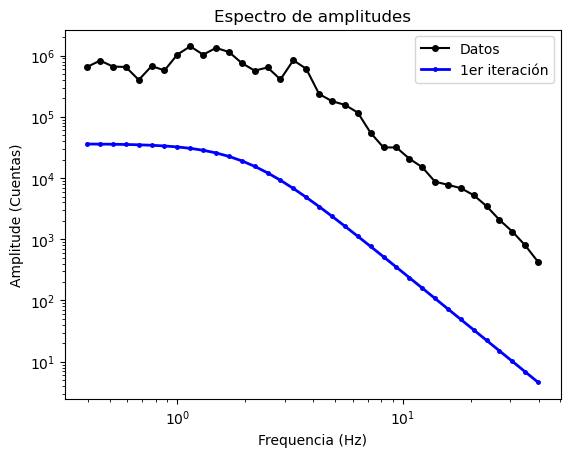

In [5]:
itermax = 5000

# Primera predicción de la solución
params = np.zeros((itermax+1, 2), dtype=float)
params[0][:] = np.array([np.exp(10.5), 2])

# Graficamos primera iteración
primera_iter = modelo(logf, params[0][0], params[0][1])
grafica_iteracion(f=logf, amp_data=amp_data_interp, iteracion=primera_iter, label='1er iteración', color_iter='blue', sd_option=False, p_iter=primera_iter, m_iter=primera_iter)

t = np.zeros((1, 2), dtype=float)

# Ciclo sobre el número de iteraciones
for i in range(itermax):

    # Estimamos la probabilidad del estado actual
    like = likelihood(logf, amp_data_interp, params[i][0], params[i][1], sd)
    #print(like, 'likeli')
    prio = priors(np.log(params[i][0]),params[i][1],mina,maxa,minb,maxb)
    #print(prio, 'prior')
    pi = like[0]+prio
    #print('total prob', pi)

    #propose new state based on current state
    t[0][0] = (mina + (maxa-mina) * np.random.rand(1,1))
    #print(t[0][0])
    # Estimamos la probabilidad del estado actual
    like = likelihood(logf, amp_data_interp, np.exp(t[0][0]), params[i][1], sd)
    #print(like, 'likeli')
    prio = priors(t[0][0],params[i][1],mina,maxa,minb,maxb)
    #print(prio, 'prior')
    pf = like[0]+prio
    #print('total probf', pf)
    
    #ratio between probabilities
    r = np.exp(pf-pi)
    #random number from uniform distribution
    u = np.random.uniform(0.8,1)
    #print(r,u, 'r, u')

    #accept-reject criteria
    if ( u < r ):   #accept
        params[i+1][0] = np.exp(t[0][0])
    else:           #reject
        params[i+1][0] = params[i][0]

    #take new proposal
    t[0][1] = (minb + (maxb-minb) * np.random.rand(1,1))

    # Estimamos la probabilidad del estado actual
    like = likelihood(logf, amp_data_interp, params[i+1][0], params[i][1], sd)
    #print(like, 'likeli')
    prio = priors(np.log(params[i+1][0]),params[i][1],mina,maxa,minb,maxb)
    #print(prio, 'prior')
    pi = like[0]+prio
    #print('total prob', pi)

    # Estimamos la probabilidad del estado actual
    like = likelihood(logf, amp_data_interp, params[i+1][0], t[0][1], sd)
    #print(like, 'likeli')
    prio = priors(np.log(params[i+1][0]),t[0][1],mina,maxa,minb,maxb)
    #print(prio, 'prior')
    pf = like[0]+prio
    
    #ratio between probabilities
    r = np.exp(pf-pi)
    #random number from uniform distribution
    u = np.random.uniform(0.8,1)
    #print(r,u, 'r, u')

    #accept-reject criteria
    if ( u < r ):   #accept
        params[i+1][1] = t[0][1]
    else:           #reject
        params[i+1][1] = params[i][1]



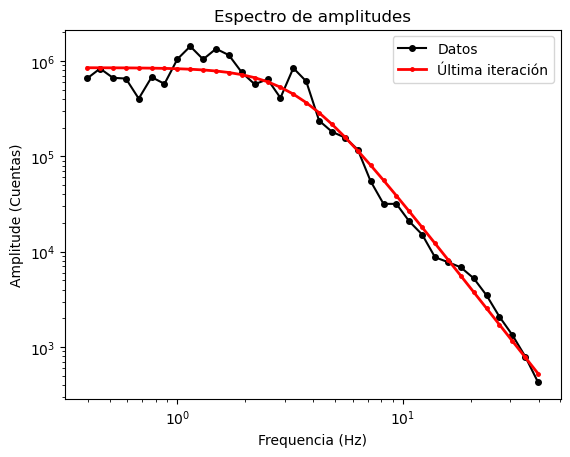

In [6]:
last_iter = modelo(logf, params[500][0], params[500][1])
grafica_iteracion(f=logf, amp_data=amp_data_interp, iteracion=last_iter, label='Última iteración', color_iter='red', sd_option=False, p_iter=last_iter, m_iter=last_iter)

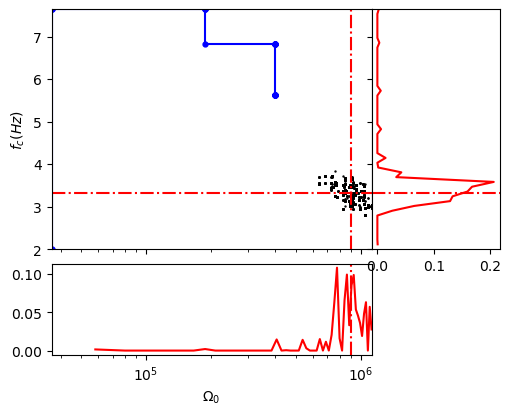

In [7]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1, 3, 1)
ax3.set_position([0.1,0.3, 0.5, 0.5])
    
burn = 100
itermax = 2000

data_x = []
for i in range(itermax):
    data_x.append(params[i][0])
# getting data of the histogram
count_x, bins_count_x = np.histogram(data_x, bins=50)
# finding the PDF of the histogram using count values
pdf_x = count_x / sum(count_x)  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_x = np.cumsum(pdf_x)

data_y = []
for i in range(itermax):
    data_y.append(params[i][1])
# getting data of the histogram
count_y, bins_count_y = np.histogram(data_y, bins=50)
# finding the PDF of the histogram using count values
pdf_y = count_y / sum(count_y)  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_y = np.cumsum(pdf_y)


# plotting PDF and CDF


for i in np.arange(burn+1, itermax):
    ax3.scatter(params[i][0], params[i][1], 0.5, color='black')

x = []
y = []
for i in range(20):
    x.append(params[i][0])
    y.append(params[i][1])
ax3.plot(x, y, 2, color='blue', marker='.', markersize=7)
ax3.set_xlim([np.min(data_x), np.max(data_x)])
ax3.set_ylim([np.min(data_y), np.max(data_y)])
ax3.set_xscale('log')
ax3.set_xticklabels([])
ax3.set_ylabel(r'$f_c (Hz)$')


ax4 = fig3.add_subplot(1, 3, 2)
ax4.set_position([0.1,0.08, 0.5, 0.19])
ax4.plot(bins_count_x[1:], pdf_x, color="red", label="PDF_x")
ax4.set_xlim([np.min(data_x), np.max(data_x)])
ax4.set_xscale('log')
ax4.set_xlabel(r'$\Omega_0$')


ax5 = fig3.add_subplot(1, 3, 3)
ax5.set_position([0.6,0.3, 0.2, 0.5])
ax5.plot(pdf_y, bins_count_y[1:], color="red", label="PDF_y")
#plt.plot(bins_count[1:], cdf, label="CDF")
ax5.set_yticklabels([])
ax5.set_ylim([np.min(data_y), np.max(data_y)])

mx = np.zeros((itermax-burn), dtype=float)
my = np.zeros((itermax-burn), dtype=float)
for i in range(itermax-burn):
    mx[i] = data_x[i+burn]
    my[i] = data_y[i+burn]

mean_omega = np.mean(mx)
mean_fc = np.mean(my)
sd_omega = np.std(mx)
sd_fc = np.std(my)

# specifying horizontal line type
ax3.axhline(y = mean_fc, color = 'r', linestyle = '-.', label='Media')
ax3.axvline(x = mean_omega, color = 'r', linestyle = '-.')

ax4.axvline(x = mean_omega, color = 'r', linestyle = '-.')
ax5.axhline(y = mean_fc, color = 'r', linestyle = '-.')



0.2188632906003418
896773.0479973895 1012285.0906087755
3.315342194946809 3.0964789043464673


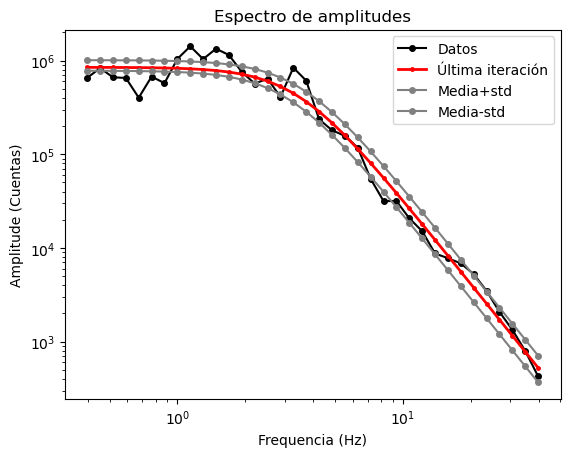

In [8]:
print(sd_fc)
# Graficamos primera iteración
print(mean_omega, mean_omega+sd_omega)
print(mean_fc, mean_fc-sd_fc)
#grafica_iteracion(f=logf, amp_data=amp_data_interp, iteracion=mean_iter, label='Media', color_iter='blue', sd_option=True, mean_omega=mean_omega, mean_fc=mean_fc, sd_omega=sd_omega, sd_fc=sd_fc)
p_iter = modelo(logf, mean_omega+sd_omega, mean_fc+sd_fc)
m_iter = modelo(logf, mean_omega-sd_omega, mean_fc-sd_fc)

grafica_iteracion(f=logf, amp_data=amp_data_interp, iteracion=last_iter, label='Última iteración', color_iter='red', sd_option=True, p_iter=p_iter, m_iter=m_iter)



Para la estrategia de MCMC, el número total de iteraciones se fija en 2000 iteraciones. Finalmente, el primer valor estimado es fc = 10 Hz y Ω0 = 1 × 10^4 (ganancia) (línea azul discontinua en la Figura 5.1a). Esta estimación inicial también se utiliza en el enfoque HMC que se detalla en el siguiente párrafo.
